In [251]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import sklearn
from sklearn import linear_model

In [195]:
bli = pd.read_csv('../data/bli.csv')

In [50]:
bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.3,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.7,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.8,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.9,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,1.8,NaN,NaN


In [201]:
weo = pd.read_csv('../data/weo.csv',thousands=',',delimiter='\t')

In [286]:
weo.head()

,Country,2015
0,Afghanistan,599.994
1,Albania,3995.383
2,Algeria,4318.135
3,Angola,4100.315
4,Antigua and Barbuda,14414.302


In [158]:
def remove_columns(df, keep_columns):
    column_names = [df.columns[i] for i in range(df.columns.size) if i not in keep_columns]
    df.drop(column_names, axis=1, inplace=True)

In [196]:
bli.drop(bli[bli['INEQUALITY'] != 'TOT'].index, inplace=True)
bli.drop(bli[bli['INDICATOR'] != 'HS_LEB'].index, inplace=True)

In [198]:
remove_columns(bli, (1, 14,))

In [199]:
bli.sort_values(by=['Country',], inplace=True)

In [203]:
remove_columns(weo, (0, 5,))
weo.sort_values(by=['Country'], inplace=True)

In [204]:
weo.head()

,Country,2015
0,Afghanistan,599.994
1,Albania,3995.383
2,Algeria,4318.135
3,Angola,4100.315
4,Antigua and Barbuda,14414.302


In [205]:
bli.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 2547 to 2576
Data columns (total 2 columns):
Country    39 non-null object
Value      39 non-null float64
dtypes: float64(1), object(1)
memory usage: 780.0+ bytes


In [206]:
weo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 189
Data columns (total 2 columns):
Country    190 non-null object
2015       187 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.7+ KB


In [207]:
df = pd.merge(bli, weo, on='Country', how='inner')

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 0 to 37
Data columns (total 3 columns):
Country    38 non-null object
Value      38 non-null float64
2015       38 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.0+ KB


In [210]:
df.head()

,Country,Value,2015
0,Australia,82.5,50961.865
1,Austria,81.3,43724.031
2,Belgium,81.1,40106.632
3,Brazil,74.7,8669.998
4,Canada,81.5,43331.961


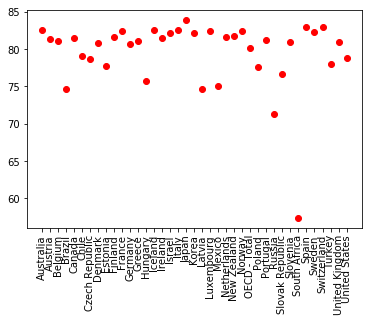

In [226]:
plt.xticks(rotation=90)
plt.plot(bli['Country'], bli['Value'], 'ro');

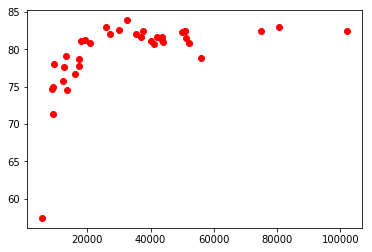

In [225]:
plt.plot(df['2015'], df['Value'], 'ro');

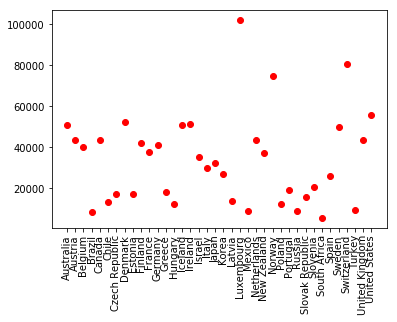

In [224]:
plt.xticks(rotation=90)
plt.plot(df['Country'], df['2015'], 'ro');

In [266]:
X = np.c_[df['2015']]

In [267]:
Y = np.c_[df['Value']]

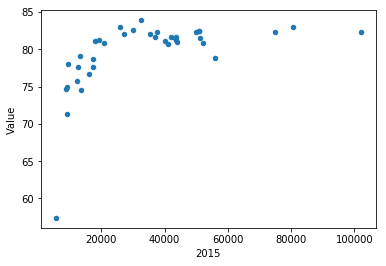

In [269]:
df.plot(kind='scatter', x='2015', y='Value');

In [270]:
model = linear_model.LinearRegression()

In [271]:
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [284]:
model.predict([[10000]])

array([[76.70298551]])